In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [2]:
data_dir = '../data/input/'
source_crs = {'init': 'epsg:4326'}
target_crs = {'init': 'epsg:27700'}

# Prepare a GeoDataFrame from input POIs

## Read input file

In [3]:
pois = pd.read_csv(data_dir + 'london_pois.csv', delimiter=';')
pois.head()

,id,name,lon,lat,kwds
0,N10287073,Wembley Central,-0.296485,51.552377,"transport,station"
1,N10370938,Hadley Wood,-0.176308,51.668605,"transport,station"
2,N10371887,Alexandra Palace,-0.120442,51.597890,"transport,station"
3,N10606316,St John Street / Goswell Road,-0.106121,51.531317,"transport,busstop"
4,N10713594,Carshalton Beeches,-0.169349,51.357211,"transport,station"


## Split keywords

In [4]:
pois['kwds'] = pois['kwds'].map(lambda s: s.split(','))
pois.head()

,id,name,lon,lat,kwds
0,N10287073,Wembley Central,-0.296485,51.552377,"[transport, station]"
1,N10370938,Hadley Wood,-0.176308,51.668605,"[transport, station]"
2,N10371887,Alexandra Palace,-0.120442,51.597890,"[transport, station]"
3,N10606316,St John Street / Goswell Road,-0.106121,51.531317,"[transport, busstop]"
4,N10713594,Carshalton Beeches,-0.169349,51.357211,"[transport, station]"


## Create geometry column

In [5]:
geom = [Point(xy) for xy in zip(pois.lon, pois.lat)]

## Create GeoDataFrame

In [6]:
pois = gpd.GeoDataFrame(pois, crs=source_crs, geometry=geom).to_crs(target_crs).drop(columns=['lon', 'lat'])
pois = pois.rename(columns={"id": "poi_id", "name": "poi_name", "kwds": "poi_kwds"})
pois.head()

,poi_id,poi_name,poi_kwds,geometry
0,N10287073,Wembley Central,"[transport, station]",POINT (518206.2277696228 185095.8309513291)
1,N10370938,Hadley Wood,"[transport, station]",POINT (526215.3641507154 198221.9922744819)
2,N10371887,Alexandra Palace,"[transport, station]",POINT (530280.7522176408 190456.0047157237)
3,N10606316,St John Street / Goswell Road,"[transport, busstop]",POINT (531464.3598053379 183078.4395275304)
4,N10713594,Carshalton Beeches,"[transport, station]",POINT (527562.7459662389 163605.7092331609)


In [7]:
print(len(pois.index))

85187


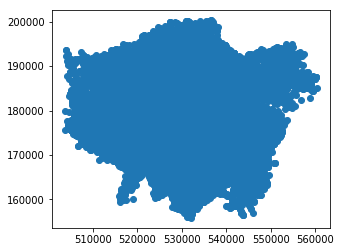

In [9]:
pois.plot()

## Save GeoDataFrame to disk

In [10]:
pois.to_pickle(data_dir + 'london_pois_gdf.pkl')